# Dataset of four classes are given. Make a model that classifies them all.

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
rand = torch.rand(200, 2) + .2 # uniform dist on (0, 1]

In [3]:
x1 = rand * torch.tensor([[20. ,20.]])
y1 = torch.tensor([0 for row in x1], dtype=torch.long)  # forst quadrant class

In [4]:
x2 = rand * torch.tensor([[-20. ,20.]])
y2 = torch.tensor([1 for row in x2], dtype=torch.long)  # second quadrant class

In [5]:
x3 = rand * torch.tensor([[-20. ,-20.]])
y3 = torch.tensor([2 for row in x3], dtype=torch.long)  # third quadrant class

In [6]:
x4 = rand * torch.tensor([[20. ,-20.]])
y4 = torch.tensor([3 for row in x4], dtype=torch.long)  # fourth quadrant class

In [7]:
x = torch.cat((x1, x2, x3, x4))
y = torch.cat((y1, y2, y3, y4))

In [8]:
DS = {'X':x, 'Y': y}

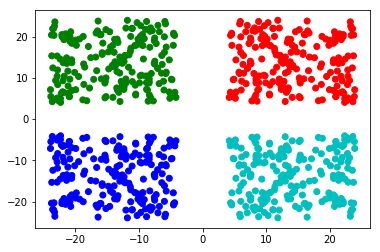

In [9]:
colormap = ['r','g','b','c']
plt.scatter(DS['X'][:,0].numpy(), DS['X'][:,1].numpy(), c=[colormap[i] for i in DS['Y']])

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [10]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        
        return self.x[index], self.y[index]

In [11]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

In [12]:
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*.7), int(len(dataset)-len(dataset)*.7)])

In [13]:
train_set

# Dataloader

In [14]:
from torch.utils.data import DataLoader

train_batch_size = 64
val_batch_size = len(val_set)

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=val_batch_size, shuffle=True)

# Model

In [15]:
class SeveralClassifier(torch.nn.Module):
    
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super(SeveralClassifier, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        self.act = torch.nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.act(out)
        out = self.linear2(out)
        return out

In [16]:
model = SeveralClassifier(2, 5, 4)

# LOSS

In [17]:
criterion = torch.nn.CrossEntropyLoss()

# Optimizer

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [19]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.nn.functional.log_softmax(y_pred, dim=1)
    y_pred = torch.argmax(y_pred, dim=1, keepdim=True)

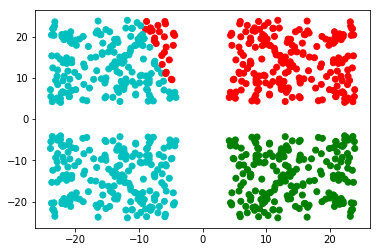

In [20]:
colormap = ['r','g','b','c']
plt.scatter(DS['X'][:,0].numpy(), DS['X'][:,1].numpy(), c=[colormap[i] for i in y_pred])

In [21]:
TRAIN_LOSS = []
VAL_LOSS = []

for epoch in range(15):
    
    sum_train_loss_in_batch = 0.
    sum_val_loss_in_batch = 0.
    
    for x, y in train_loader:
        
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        
        sum_train_loss_in_batch += loss.item()
    
    with torch.no_grad():
        for x, y in val_loader:

            y_hat = model(x)
            loss = criterion(y_hat, y)

            sum_val_loss_in_batch += loss.item()
    
        
    train_loss_in_epoch = sum_train_loss_in_batch/train_batch_size
    val_loss_in_epoch = sum_val_loss_in_batch/val_batch_size
    
    TRAIN_LOSS.append(train_loss_in_epoch)
    VAL_LOSS.append(val_loss_in_epoch)
    
    print(f"Epoch {epoch} train loss: {train_loss_in_epoch} val loss: {val_loss_in_epoch}")

Epoch 0 train loss: 0.13289074366912246 val loss: 0.0015805130203564962
Epoch 1 train loss: 0.031153878197073936 val loss: 0.0004279721217850844
Epoch 2 train loss: 0.00988083123229444 val loss: 0.00018288715121646723
Epoch 3 train loss: 0.004745054378872737 val loss: 0.00010513444431126118
Epoch 4 train loss: 0.0030456178647000343 val loss: 7.636010802040498e-05
Epoch 5 train loss: 0.0023308902309508994 val loss: 6.180635731046398e-05
Epoch 6 train loss: 0.001934237778186798 val loss: 5.3007858029256263e-05
Epoch 7 train loss: 0.0016846322687342763 val loss: 4.686395404860377e-05
Epoch 8 train loss: 0.0014988163020461798 val loss: 4.2026920709759e-05
Epoch 9 train loss: 0.0013525348185794428 val loss: 3.814177277187506e-05
Epoch 10 train loss: 0.001229990622960031 val loss: 3.4803365512440605e-05
Epoch 11 train loss: 0.0011259970124228857 val loss: 3.1946913804858926e-05
Epoch 12 train loss: 0.001036637811921537 val loss: 2.9471691232174634e-05
Epoch 13 train loss: 0.00095669579604873

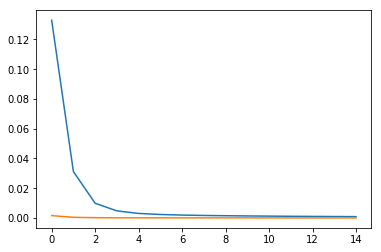

In [22]:
plt.plot(TRAIN_LOSS)
plt.plot(VAL_LOSS)

In [23]:
with torch.no_grad():
    y_hat = model(DS['X'])
    y_pred = torch.argmax(y_hat, dim=1)

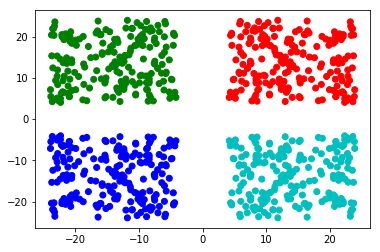

In [24]:
colormap = ['r', 'g', 'b', 'c']
plt.scatter(DS['X'][:,0].numpy(), DS['X'][:,1].numpy(), c=[colormap[i] for i in y_pred])